# Gene Expression Analysis

## Import Packages

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [3]:
import seaborn as sns

## Time Series Analysis

### Load Dataset

In [4]:
data = pd.read_csv('data.csv')
data.head()

,Time (min),x1,x2,x3,x4,x5
0,0.0,1.026883,0.452576,0.010064,0.559813,0.427413
1,0.1,1.026280,0.515807,0.083923,0.638963,0.598679
2,0.2,0.764232,0.519774,0.163960,0.693449,0.790495
3,0.3,0.871743,0.516790,0.208298,0.798266,0.898877
4,0.4,0.805830,0.425989,0.239270,0.915158,0.947471


In [5]:
data.dtypes

Time (min)    float64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
dtype: object

### Column Renaming

In [6]:
data = data.rename(columns={'Time (min)':'Time'})

In [7]:
data

,Time,x1,x2,x3,x4,x5
0,0.0,1.026883,0.452576,0.010064,0.559813,0.427413
1,0.1,1.026280,0.515807,0.083923,0.638963,0.598679
2,0.2,0.764232,0.519774,0.163960,0.693449,0.790495
3,0.3,0.871743,0.516790,0.208298,0.798266,0.898877
4,0.4,0.805830,0.425989,0.239270,0.915158,0.947471
...,...,...,...,...,...,...
296,29.6,1.720076,1.524916,1.318508,1.605543,1.762414
297,29.7,1.873344,1.562847,1.457175,1.694691,1.833713
298,29.8,1.730956,1.615685,1.501105,1.552917,1.802832
299,29.9,1.717174,1.606388,1.167889,1.667837,1.745518


### Set Column Index

In [8]:
data.set_index('Time',inplace=True)

In [9]:
ts = data
ts.head()

,x1,x2,x3,x4,x5
Time,,,,,
0.0,1.026883,0.452576,0.010064,0.559813,0.427413
0.1,1.026280,0.515807,0.083923,0.638963,0.598679
0.2,0.764232,0.519774,0.163960,0.693449,0.790495
0.3,0.871743,0.516790,0.208298,0.798266,0.898877
0.4,0.805830,0.425989,0.239270,0.915158,0.947471


### Data Visualizing

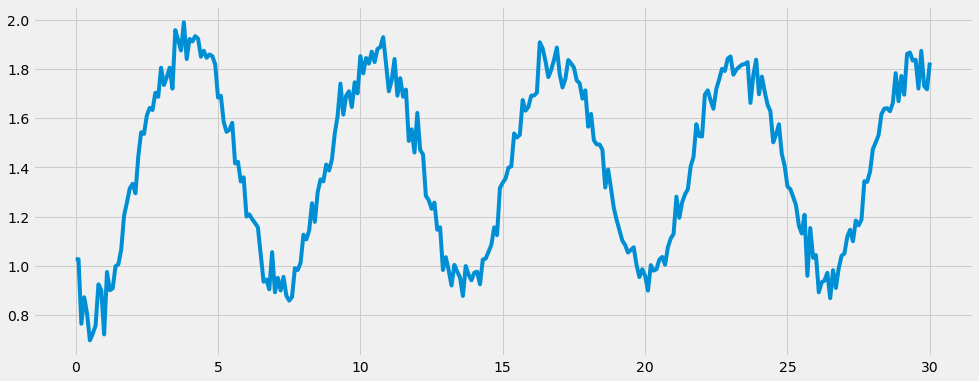

In [10]:
rcParams['figure.figsize'] = 15,6
plt.plot(ts['x1'])

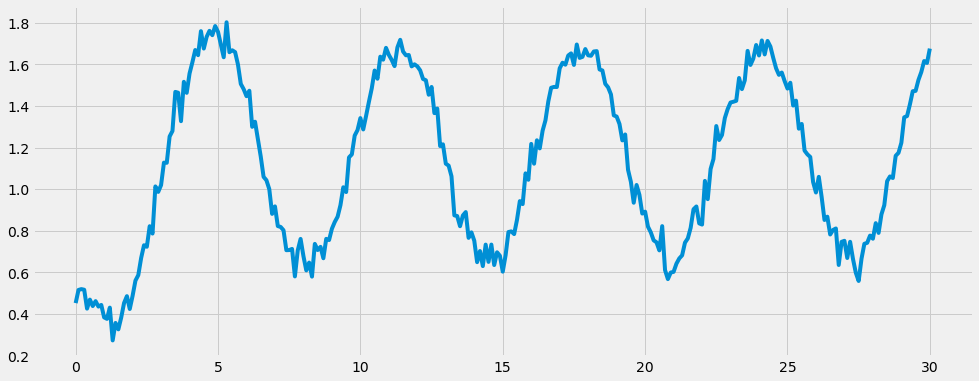

In [11]:
rcParams['figure.figsize'] = 15,6
plt.plot(ts['x2'])

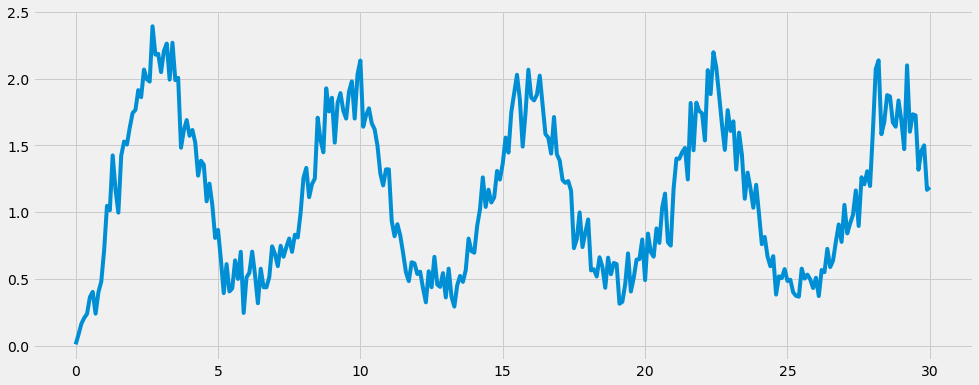

In [12]:
rcParams['figure.figsize'] = 15,6
plt.plot(ts['x3'])

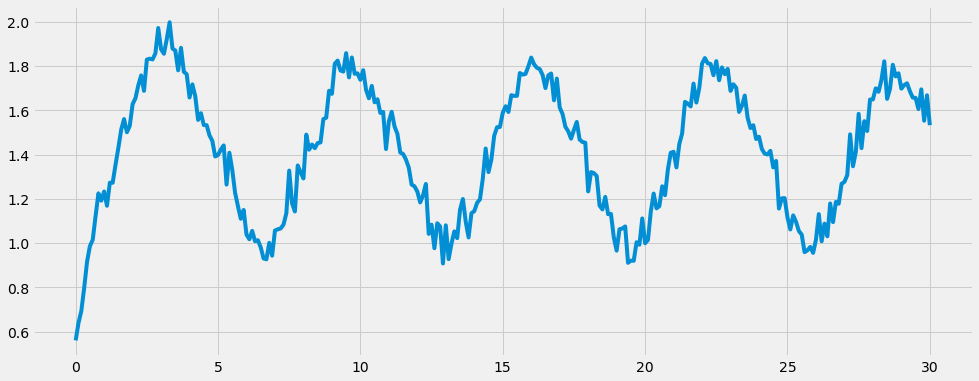

In [13]:
rcParams['figure.figsize'] = 15,6
plt.plot(ts['x4'])

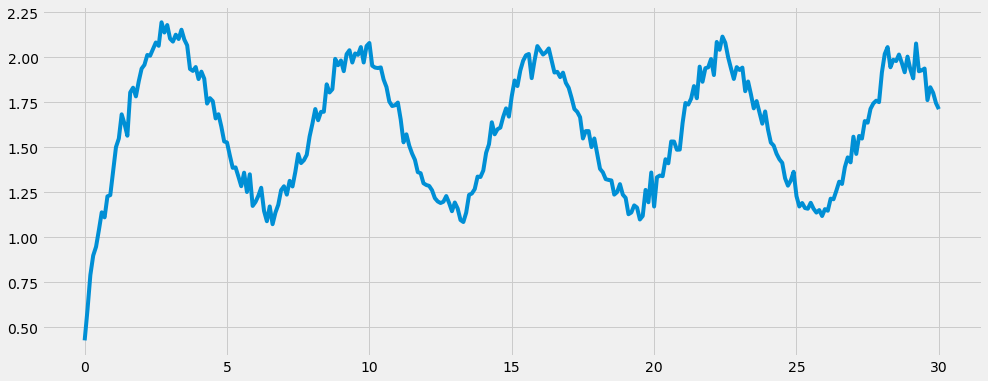

In [14]:
rcParams['figure.figsize'] = 15,6
plt.plot(ts['x5'])

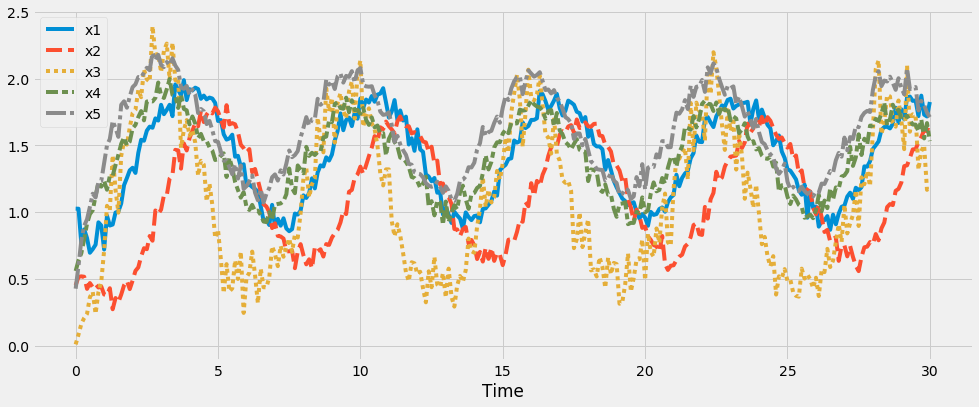

In [15]:
rcParams['figure.figsize'] = 15,6
sns.lineplot(data=ts)

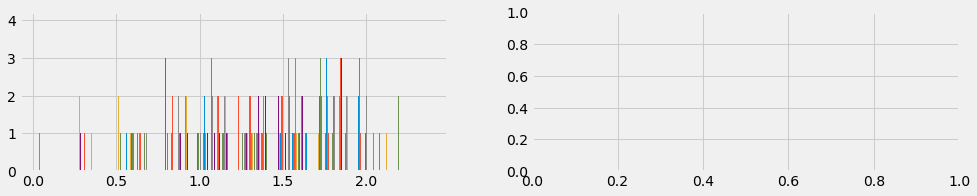

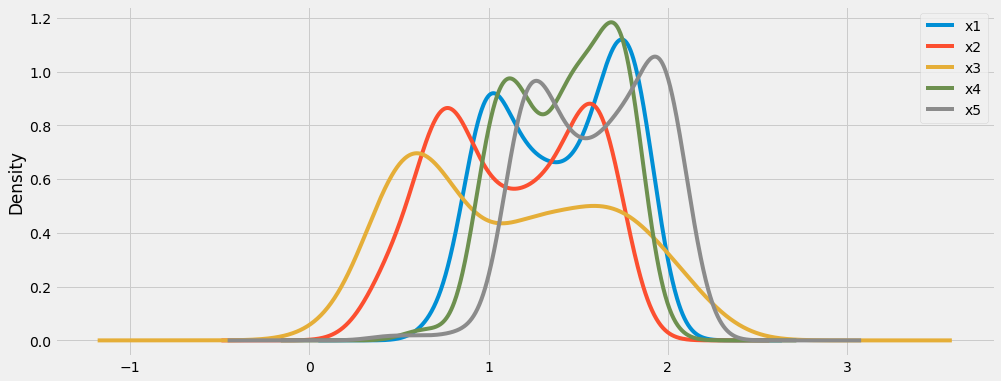

In [16]:
plt.subplot(221)
plt.hist(ts)
plt.subplot(222)
ts.plot(kind = 'kde')

### Rolling Statistics

In [17]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()
    
    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

### Test Stationary

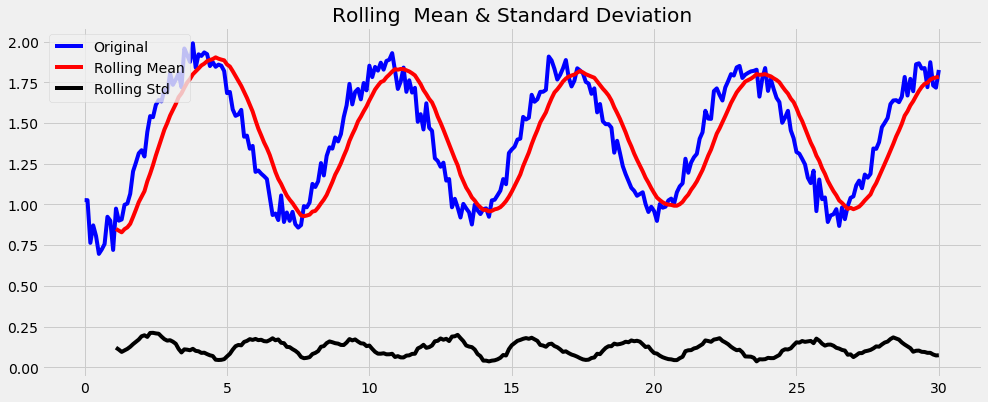

Results of Dickey-Fuller Test:
Test Statistic                -8.660008e+00
p-value                        4.851200e-14
#Lags Used                     1.600000e+01
Number of Observations Used    2.840000e+02
Critical Value (1%)           -3.453587e+00
Critical Value (5%)           -2.871771e+00
Critical Value (10%)          -2.572222e+00
dtype: float64


In [18]:
test_stationarity(ts['x1'])

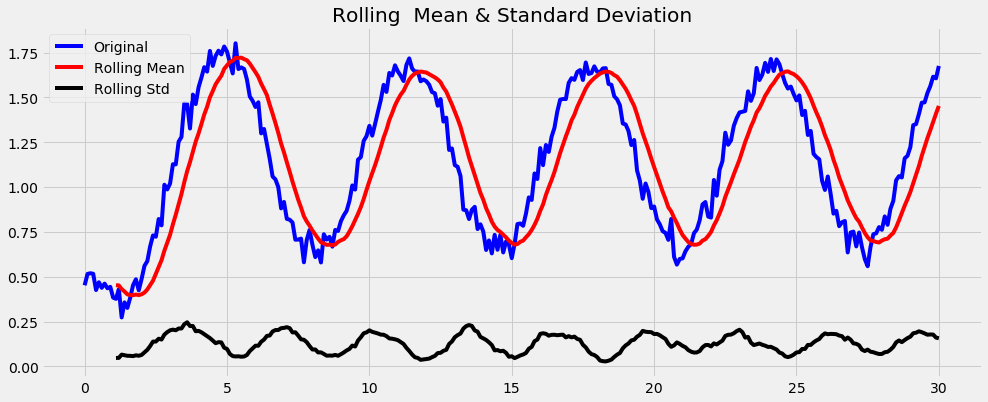

Results of Dickey-Fuller Test:
Test Statistic                -8.830365e+00
p-value                        1.776604e-14
#Lags Used                     1.500000e+01
Number of Observations Used    2.850000e+02
Critical Value (1%)           -3.453505e+00
Critical Value (5%)           -2.871735e+00
Critical Value (10%)          -2.572202e+00
dtype: float64


In [19]:
test_stationarity(ts['x2'])

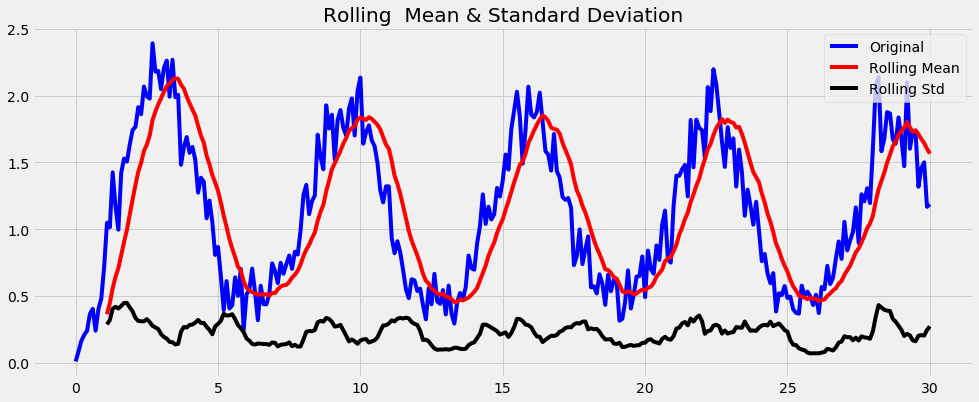

Results of Dickey-Fuller Test:
Test Statistic                -7.197430e+00
p-value                        2.414135e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.850000e+02
Critical Value (1%)           -3.453505e+00
Critical Value (5%)           -2.871735e+00
Critical Value (10%)          -2.572202e+00
dtype: float64


In [20]:
test_stationarity(ts['x3'])

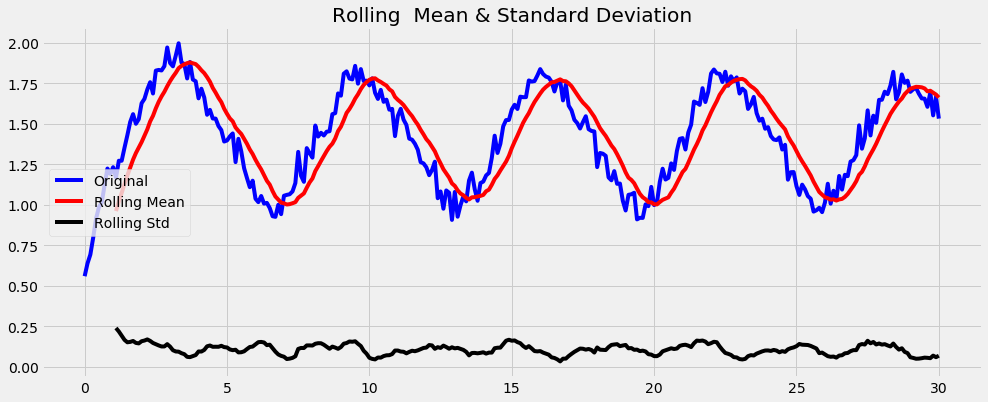

Results of Dickey-Fuller Test:
Test Statistic                -7.829768e+00
p-value                        6.338840e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.870000e+02
Critical Value (1%)           -3.453342e+00
Critical Value (5%)           -2.871664e+00
Critical Value (10%)          -2.572164e+00
dtype: float64


In [21]:
test_stationarity(ts['x4'])

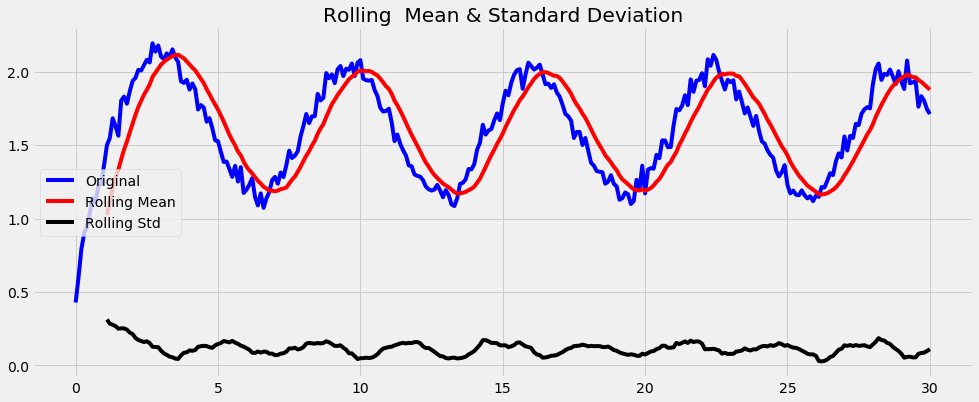

Results of Dickey-Fuller Test:
Test Statistic                -8.980393e+00
p-value                        7.336965e-15
#Lags Used                     1.500000e+01
Number of Observations Used    2.850000e+02
Critical Value (1%)           -3.453505e+00
Critical Value (5%)           -2.871735e+00
Critical Value (10%)          -2.572202e+00
dtype: float64


In [22]:
test_stationarity(ts['x5'])

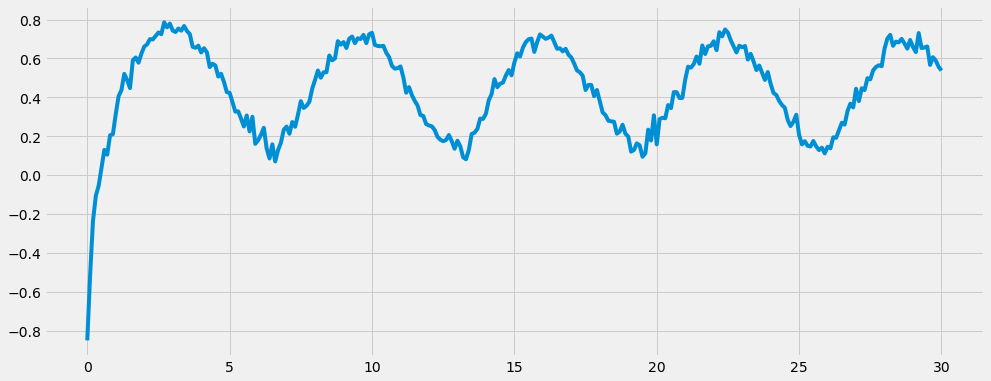

In [23]:
ts_log = np.log(ts['x5'])
plt.plot(ts_log)

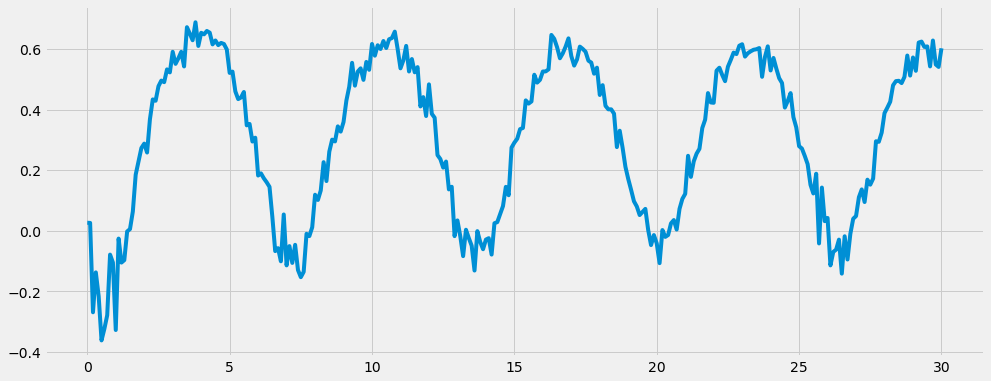

In [24]:
ts_log = np.log(ts['x1'])
plt.plot(ts_log)

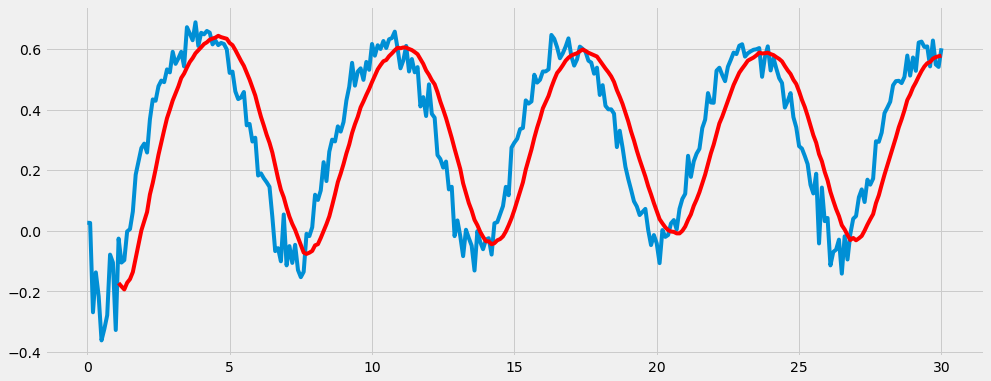

In [25]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

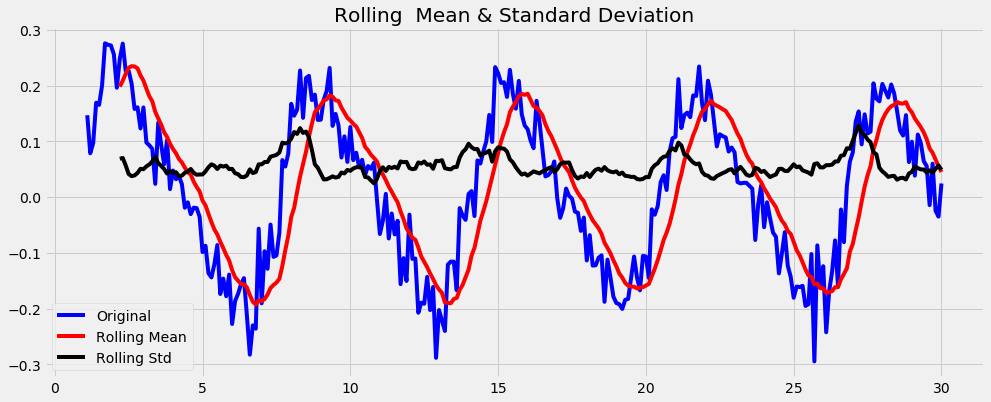

Results of Dickey-Fuller Test:
Test Statistic                -5.762404e+00
p-value                        5.632596e-07
#Lags Used                     1.000000e+01
Number of Observations Used    2.790000e+02
Critical Value (1%)           -3.454008e+00
Critical Value (5%)           -2.871956e+00
Critical Value (10%)          -2.572320e+00
dtype: float64


In [26]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)

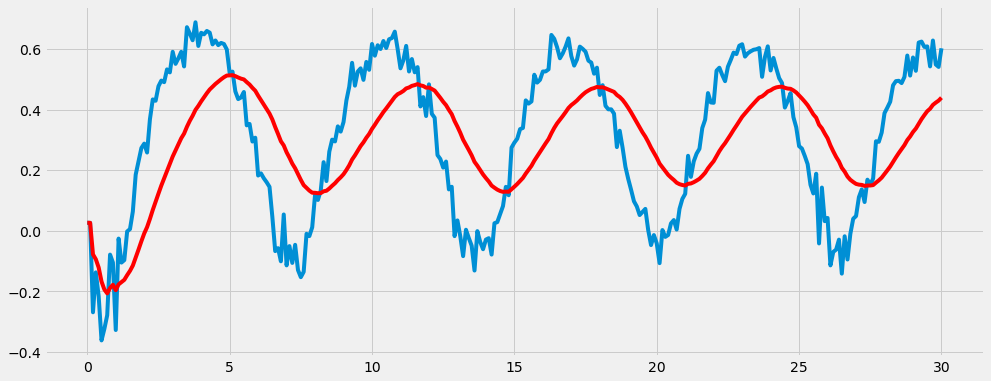

In [27]:
exp_weighted_avg = ts_log.ewm(halflife = 12).mean()
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color = 'red')

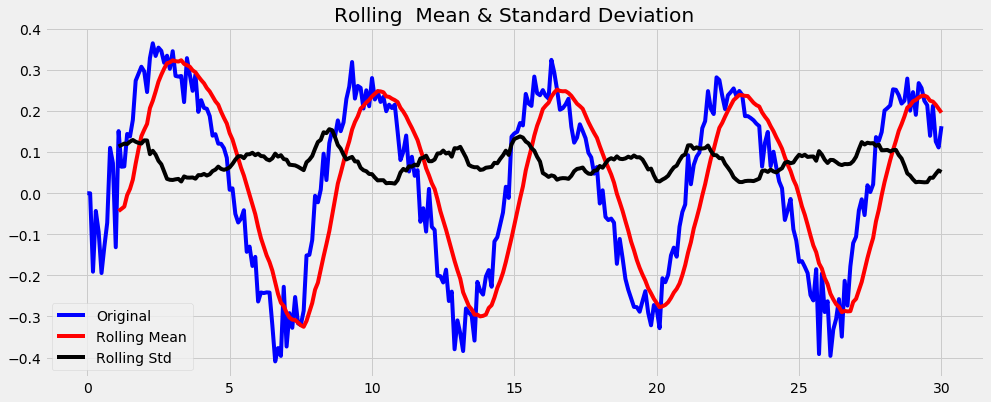

Results of Dickey-Fuller Test:
Test Statistic                -7.163070e+00
p-value                        2.933729e-10
#Lags Used                     1.200000e+01
Number of Observations Used    2.880000e+02
Critical Value (1%)           -3.453262e+00
Critical Value (5%)           -2.871628e+00
Critical Value (10%)          -2.572146e+00
dtype: float64


In [28]:
ts_log_ema_diff = ts_log - exp_weighted_avg
test_stationarity(ts_log_ema_diff)

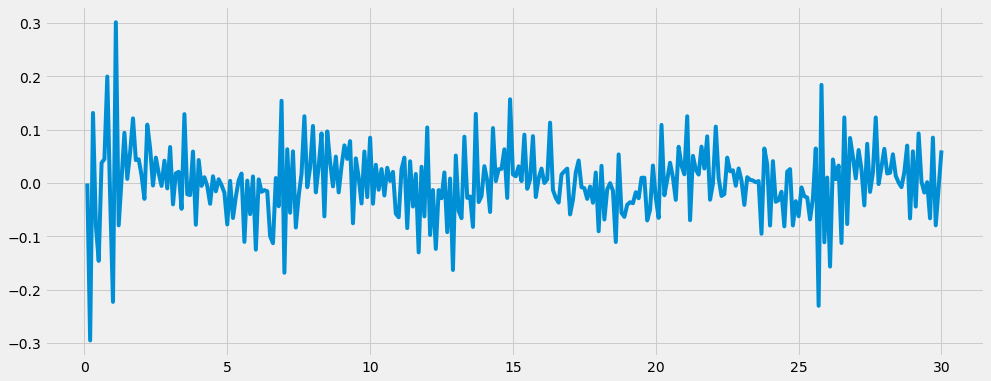

In [29]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

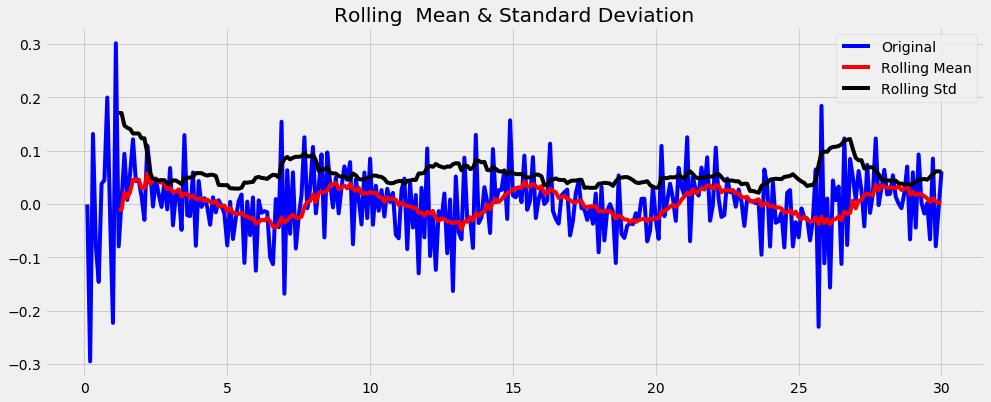

Results of Dickey-Fuller Test:
Test Statistic                  -4.894814
p-value                          0.000036
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


In [30]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

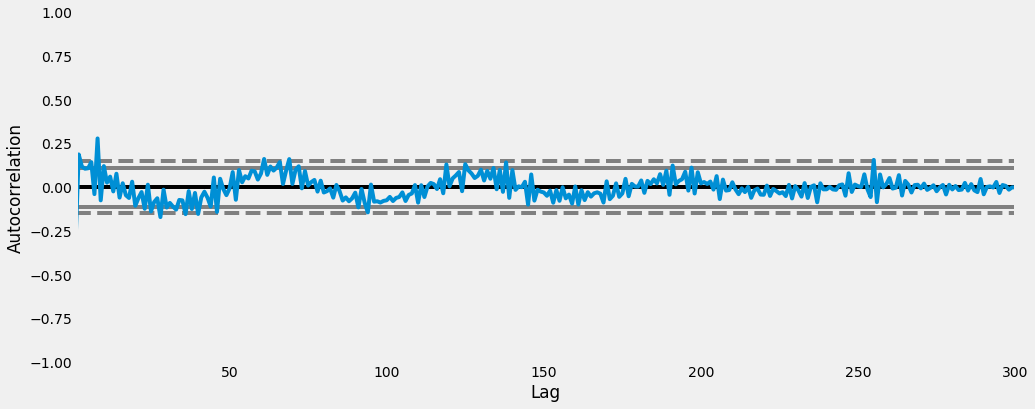

In [31]:
pd.plotting.autocorrelation_plot(ts_log_diff)

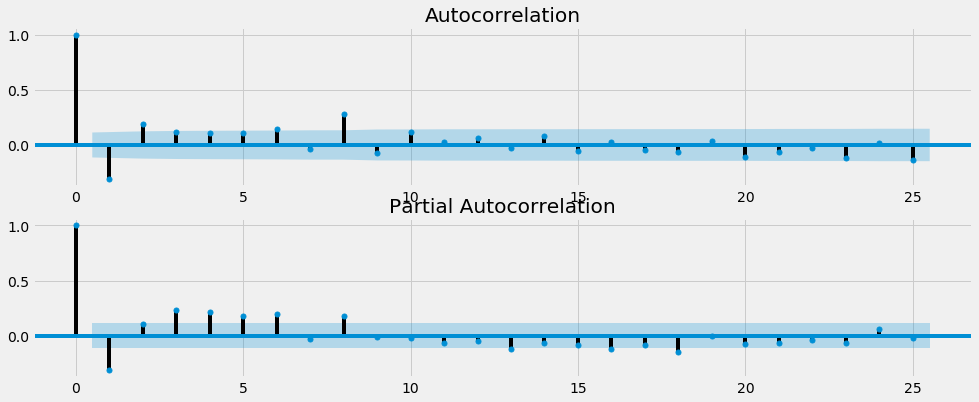

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(211)
plot_acf(ts_log_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(ts_log_diff, ax=plt.gca())
plt.show()

## Distribution of each Gene

### Distribution of Gene 1

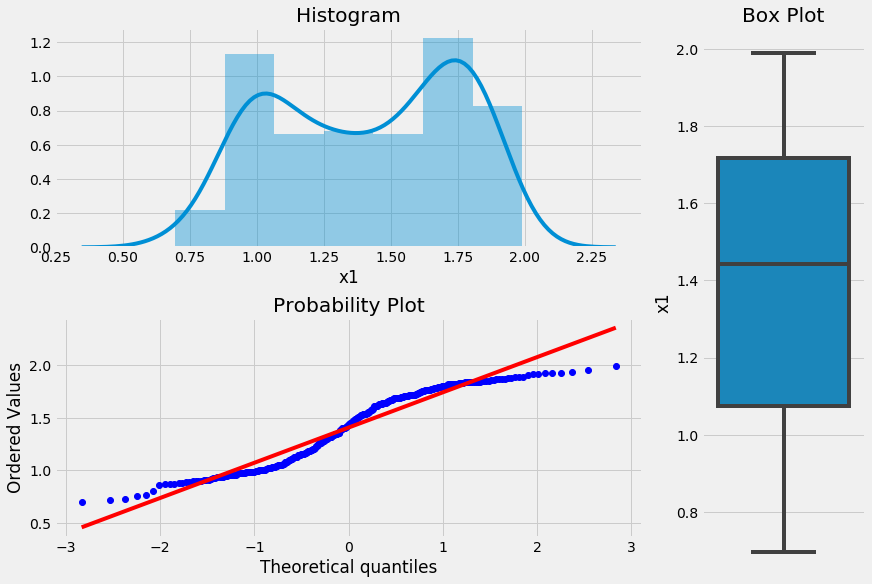

In [33]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(data, 'x1')

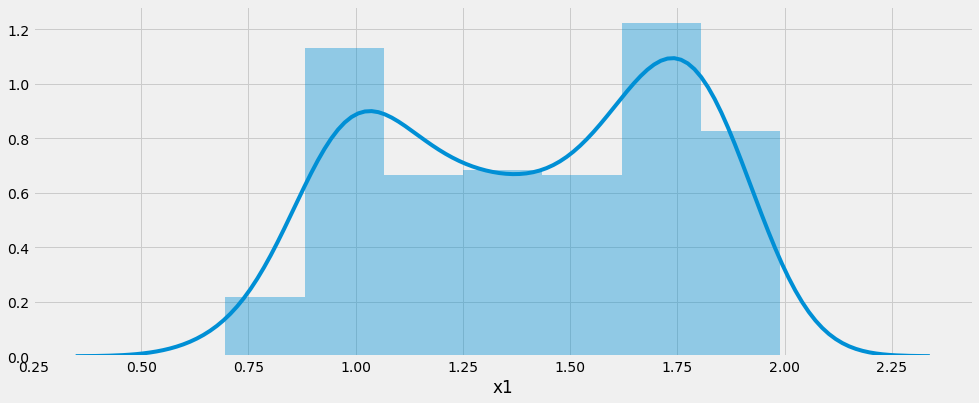

In [34]:
sns.distplot(data['x1'])

### Distribution of Gene 2

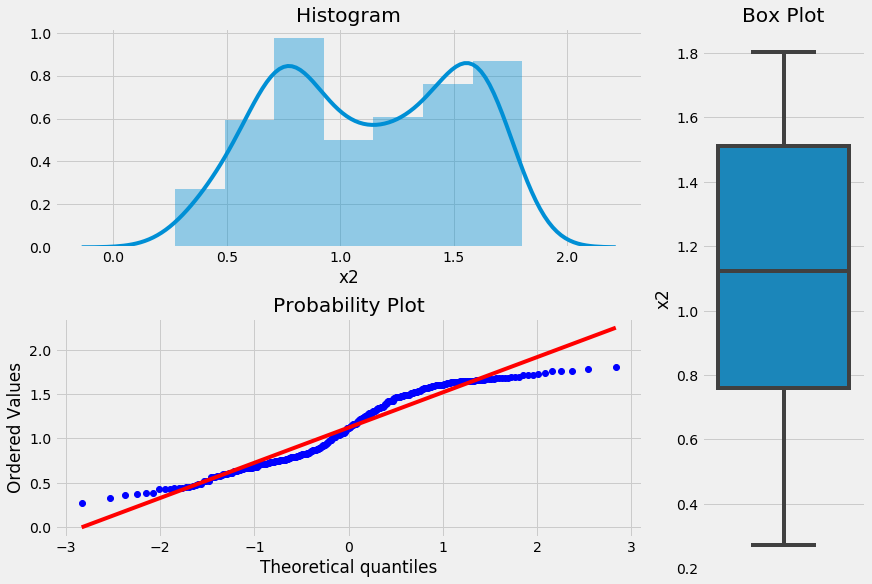

In [35]:
plotting_3_chart(data, 'x2')

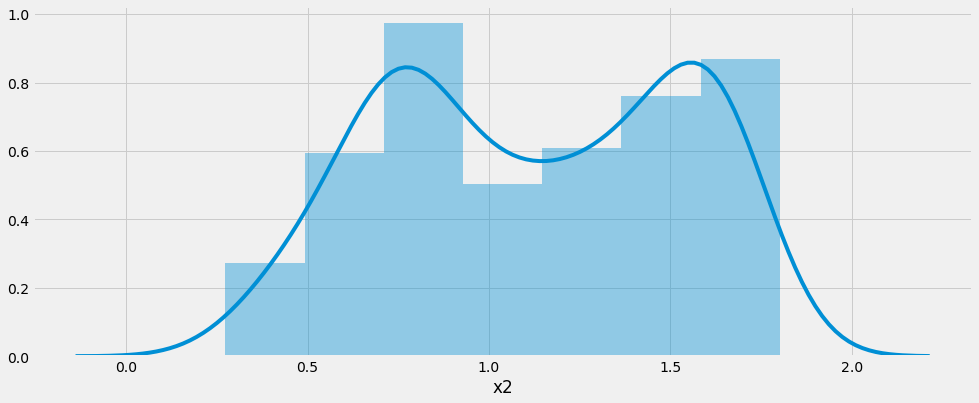

In [36]:
sns.distplot(data['x2'])

### Distribution of Gene 3

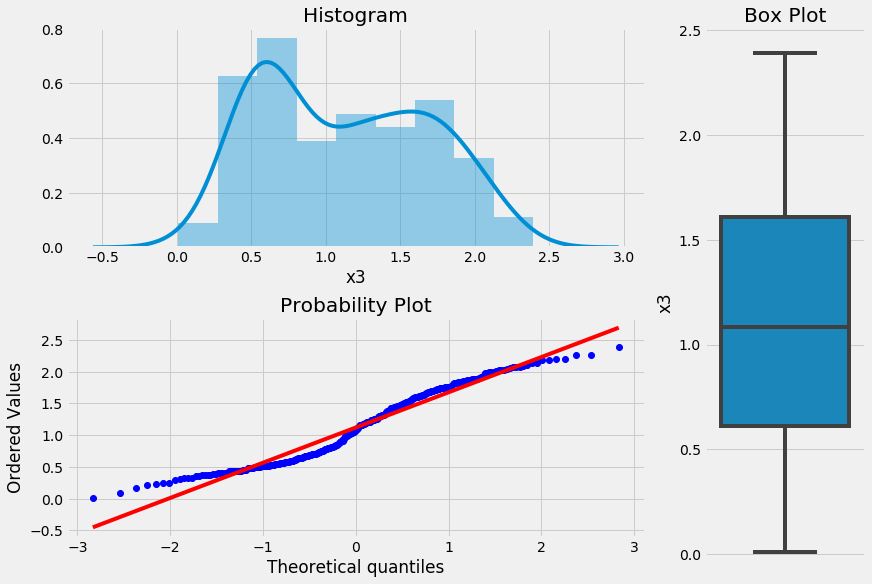

In [37]:
plotting_3_chart(data, 'x3')

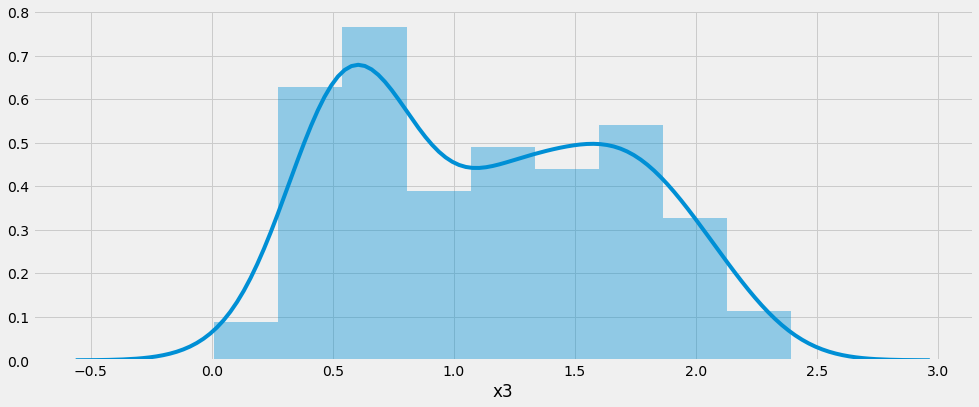

In [38]:
sns.distplot(data['x3'])

### Distribution of Gene 4

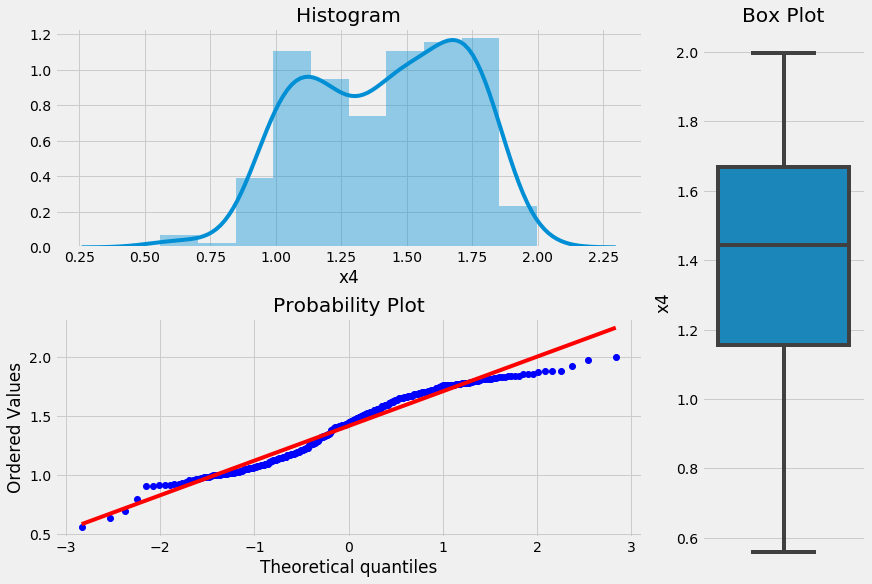

In [39]:
plotting_3_chart(data, 'x4')

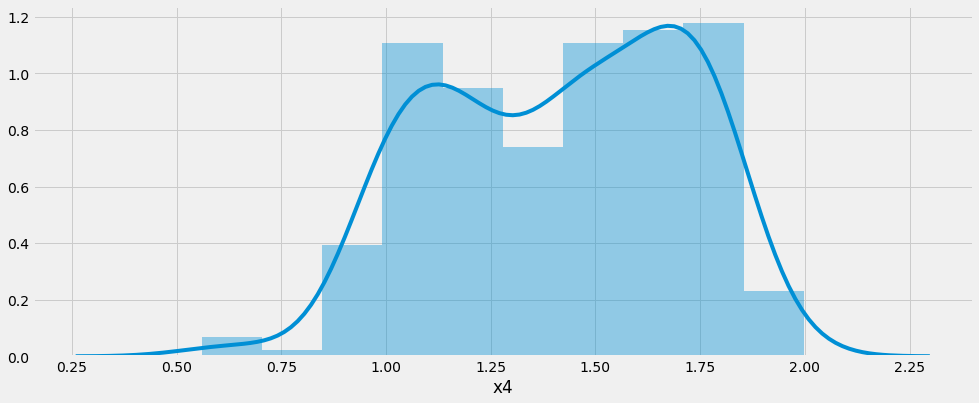

In [40]:
sns.distplot(data['x4'])

### Distribution of Gene 5

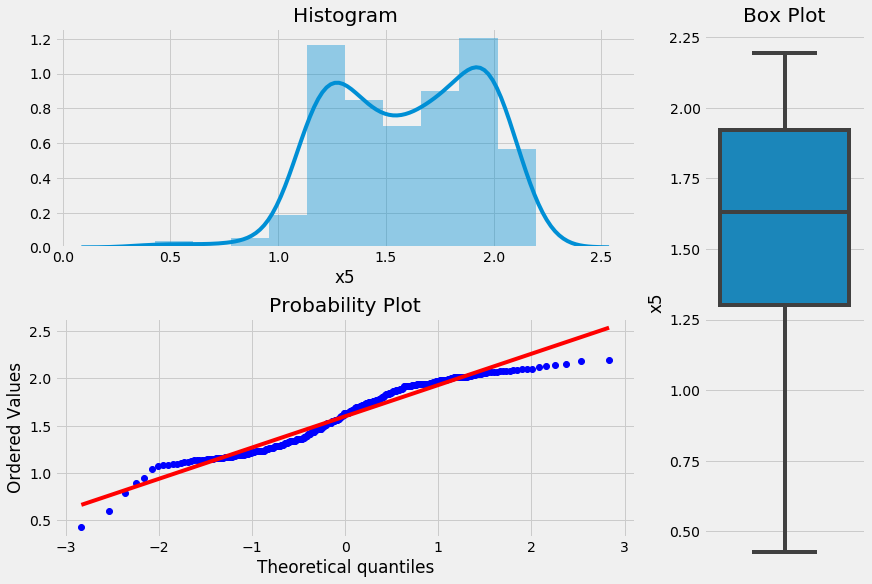

In [41]:
plotting_3_chart(data, 'x5')

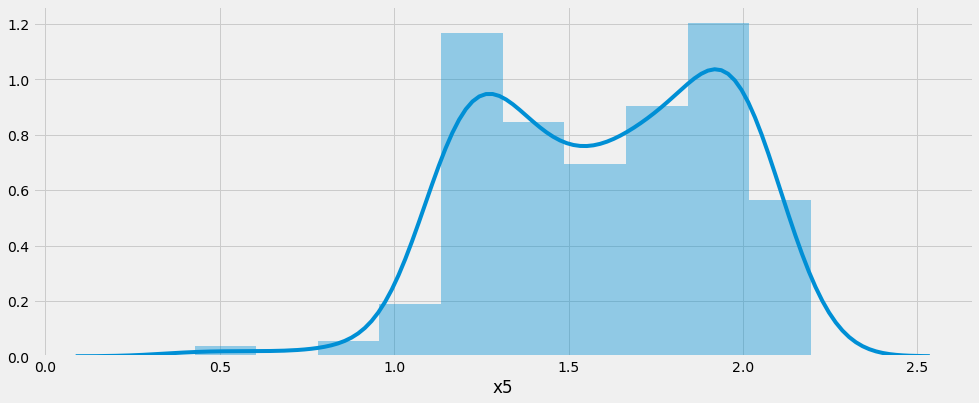

In [42]:
sns.distplot(data['x5'])

## Correlation and scatter plots

### Finding Correlation

In [43]:
corr = data.corr(method='pearson')
corr.head()

,x1,x2,x3,x4,x5
x1,1.000000,0.683007,0.601942,0.766727,0.681609
x2,0.683007,1.000000,-0.077471,0.141464,0.022553
x3,0.601942,-0.077471,1.000000,0.893707,0.969456
x4,0.766727,0.141464,0.893707,1.000000,0.961492
x5,0.681609,0.022553,0.969456,0.961492,1.000000


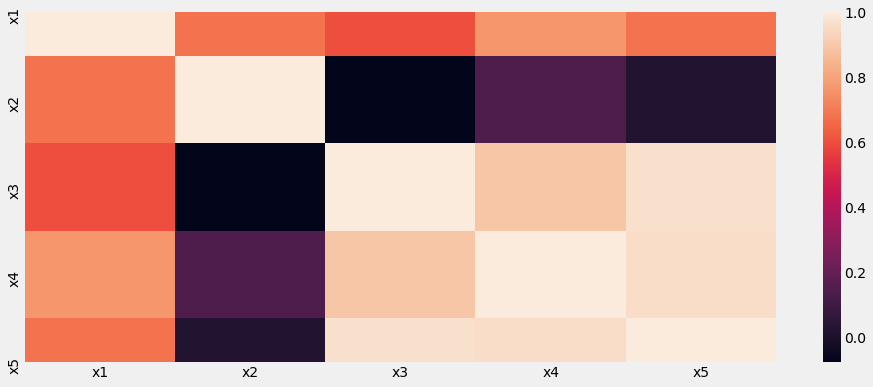

In [44]:
import seaborn as sns
sns.heatmap(corr) # this will give you a basic heat map

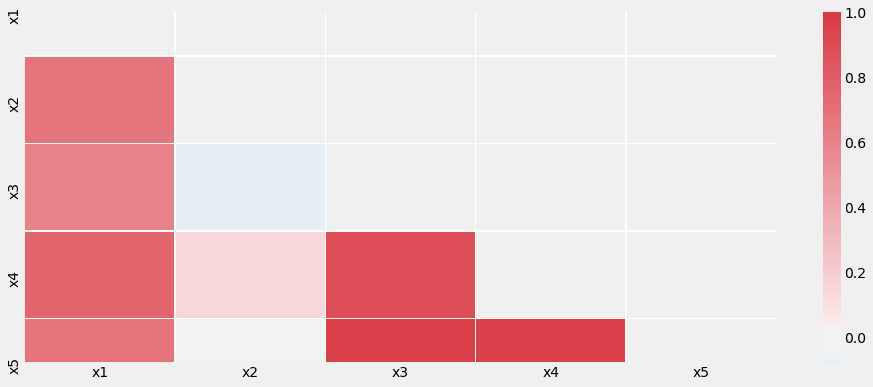

In [45]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0)

### Scatter Plot

In [46]:
df2=pd.read_csv('data.csv')

In [47]:
df2.head()

,Time (min),x1,x2,x3,x4,x5
0,0.0,1.026883,0.452576,0.010064,0.559813,0.427413
1,0.1,1.026280,0.515807,0.083923,0.638963,0.598679
2,0.2,0.764232,0.519774,0.163960,0.693449,0.790495
3,0.3,0.871743,0.516790,0.208298,0.798266,0.898877
4,0.4,0.805830,0.425989,0.239270,0.915158,0.947471


In [48]:
df2 = df2.rename(columns={'Time (min)':'time'})

In [49]:
df2.head()

,time,x1,x2,x3,x4,x5
0,0.0,1.026883,0.452576,0.010064,0.559813,0.427413
1,0.1,1.026280,0.515807,0.083923,0.638963,0.598679
2,0.2,0.764232,0.519774,0.163960,0.693449,0.790495
3,0.3,0.871743,0.516790,0.208298,0.798266,0.898877
4,0.4,0.805830,0.425989,0.239270,0.915158,0.947471


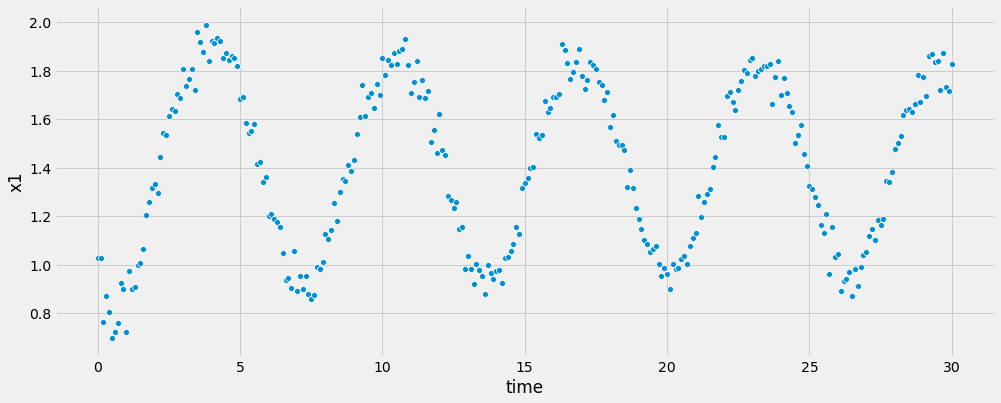

In [50]:
sns.scatterplot(x=df2['time'], y=df2['x1'])

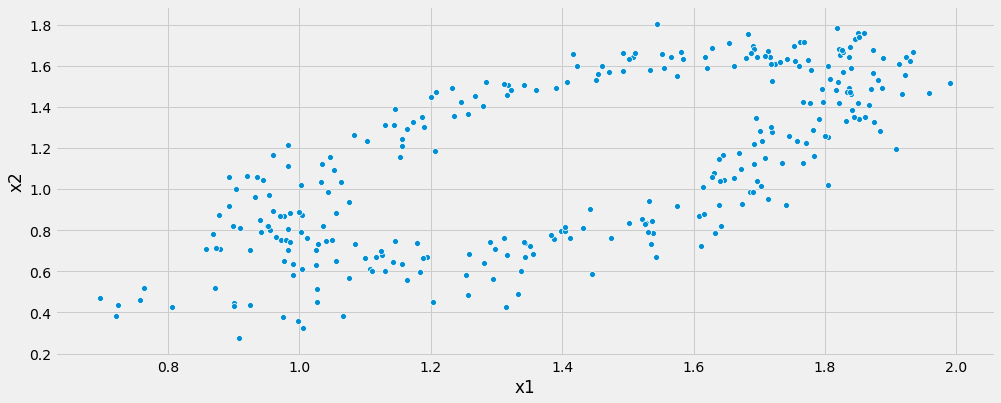

In [51]:
sns.scatterplot(x=df2['x1'], y=df2['x2'])

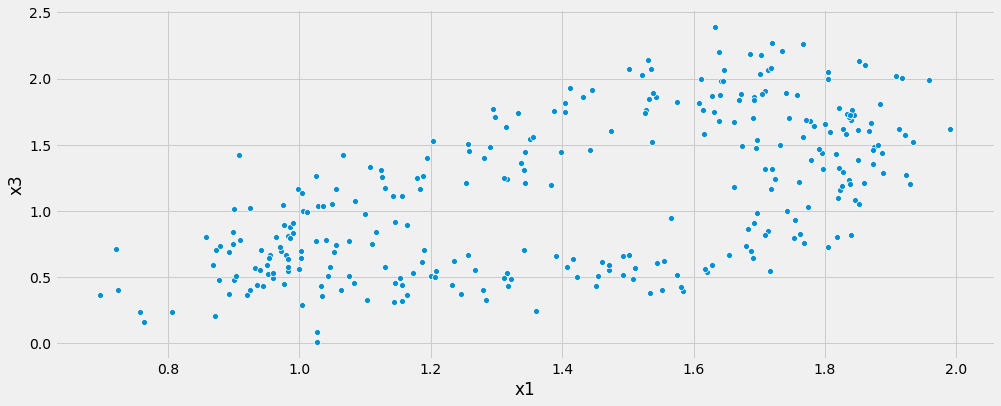

In [52]:
sns.scatterplot(x=df2['x1'], y=df2['x3'])

## Pair Plot

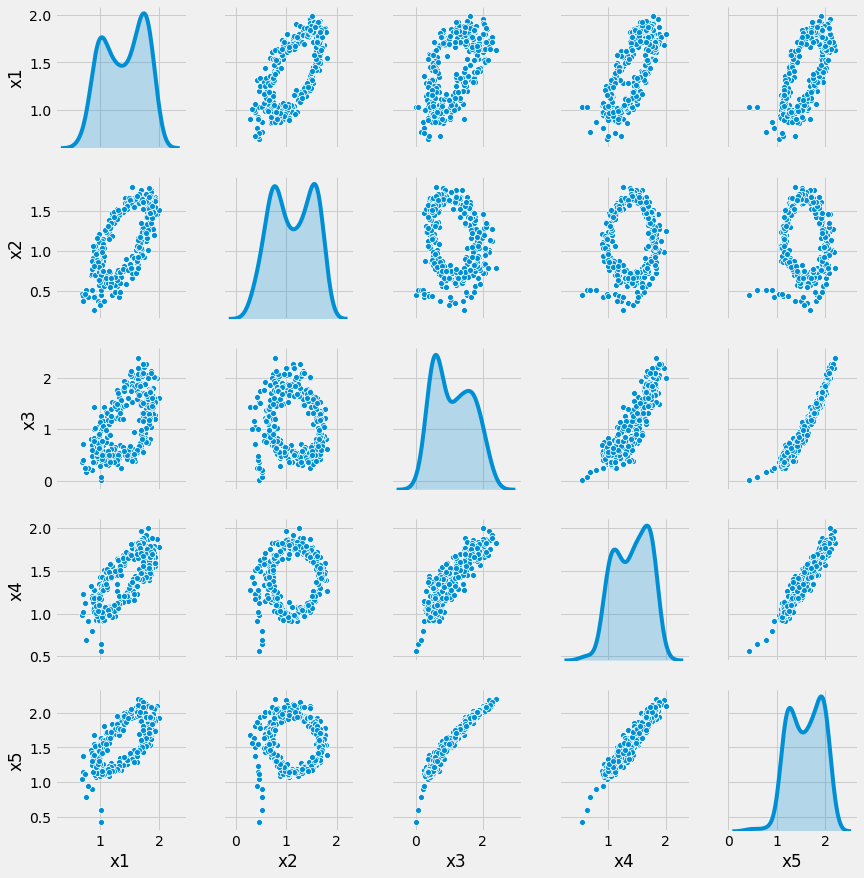

In [53]:
sns.pairplot(data, diag_kind="kde")

# Principal Component Anlaysis PCA

In [54]:
df3 = pd.read_csv('data.csv')
df3.head()

,Time (min),x1,x2,x3,x4,x5
0,0.0,1.026883,0.452576,0.010064,0.559813,0.427413
1,0.1,1.026280,0.515807,0.083923,0.638963,0.598679
2,0.2,0.764232,0.519774,0.163960,0.693449,0.790495
3,0.3,0.871743,0.516790,0.208298,0.798266,0.898877
4,0.4,0.805830,0.425989,0.239270,0.915158,0.947471


### Standardize the Dataset

In [55]:
from sklearn.preprocessing import StandardScaler
variables = ['x1','x2','x3','x4','x5']
x = df3.loc[:, variables].values
y = df3.loc[:,['Time (min)']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [56]:
x.head()

,0,1,2,3,4
0,-1.107734,-1.649810,-1.972554,-2.893952,-3.495973
1,-1.109490,-1.494090,-1.841462,-2.626375,-2.985179
2,-1.872086,-1.484322,-1.699405,-2.442179,-2.413096
3,-1.559213,-1.491671,-1.620708,-2.087837,-2.089852
4,-1.751029,-1.715287,-1.565736,-1.692670,-1.944921


## PCA

### Reduce into 2 Two Dimensions

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1
0,5.002493,0.178268
1,4.515664,0.229065
2,4.402442,0.731641
3,3.872635,0.734075
4,3.685462,1.086537


### Explained Variance Ratio

In [58]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.7009448 , 0.27201835])

In [59]:
x_pca['Time (min)']=y
x_pca.columns = ['PC1','PC2','Time']
x_pca.head()

,PC1,PC2,Time
0,5.002493,0.178268,0.0
1,4.515664,0.229065,0.1
2,4.402442,0.731641,0.2
3,3.872635,0.734075,0.3
4,3.685462,1.086537,0.4


### Visualization 

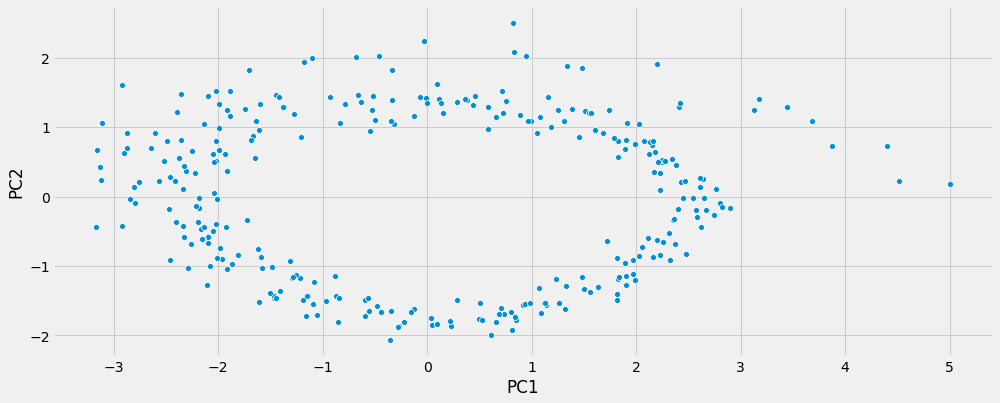

In [60]:
ax = sns.scatterplot(x="PC1", y="PC2",data=x_pca)

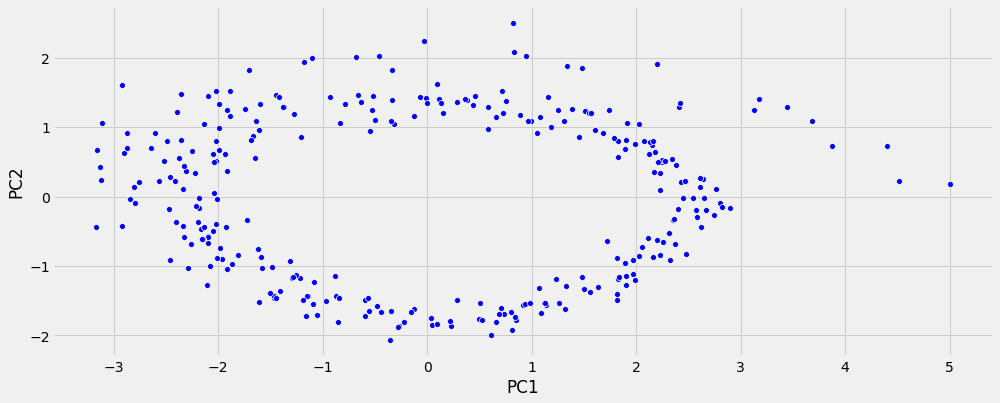

In [61]:
ax = sns.scatterplot(x="PC1", y="PC2",data=x_pca,color='b')

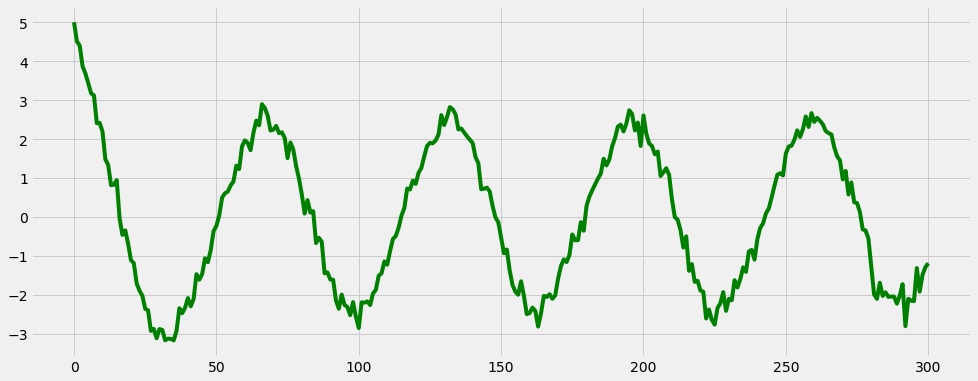

In [62]:
plt.plot(x_pca['PC1'],color='g')

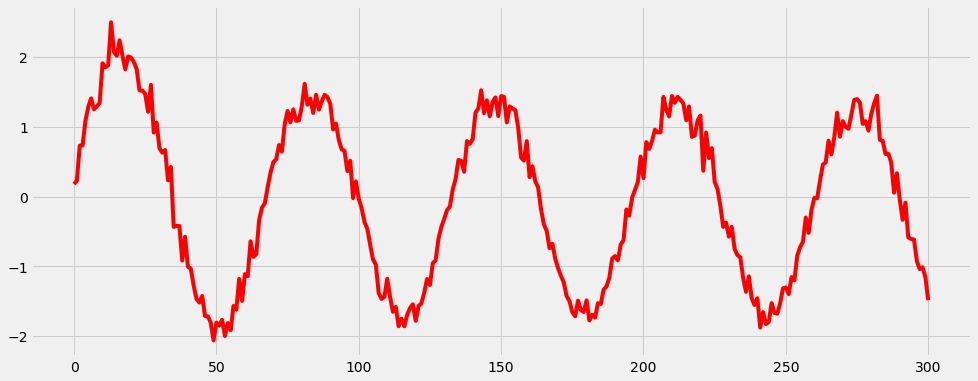

In [63]:
plt.plot(x_pca['PC2'],color='r')

## PCA

In [65]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('data.csv')
df.head()

,Time (min),x1,x2,x3,x4,x5
0,0.0,1.026883,0.452576,0.010064,0.559813,0.427413
1,0.1,1.026280,0.515807,0.083923,0.638963,0.598679
2,0.2,0.764232,0.519774,0.163960,0.693449,0.790495
3,0.3,0.871743,0.516790,0.208298,0.798266,0.898877
4,0.4,0.805830,0.425989,0.239270,0.915158,0.947471


In [66]:
from sklearn.preprocessing import StandardScaler
variables = ['x1','x2','x3','x4','x5']
x = df.loc[:, variables].values
y = df.loc[:,['Time (min)']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [67]:
x.head()

,0,1,2,3,4
0,-1.107734,-1.649810,-1.972554,-2.893952,-3.495973
1,-1.109490,-1.494090,-1.841462,-2.626375,-2.985179
2,-1.872086,-1.484322,-1.699405,-2.442179,-2.413096
3,-1.559213,-1.491671,-1.620708,-2.087837,-2.089852
4,-1.751029,-1.715287,-1.565736,-1.692670,-1.944921


In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1
0,5.002493,0.178268
1,4.515664,0.229065
2,4.402442,0.731641
3,3.872635,0.734075
4,3.685462,1.086537


In [69]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.7009448 , 0.27201835])

In [70]:
x_pca['Time (min)']=y
x_pca.columns = ['PC1','PC2','Time']
x_pca.head()

,PC1,PC2,Time
0,5.002493,0.178268,0.0
1,4.515664,0.229065,0.1
2,4.402442,0.731641,0.2
3,3.872635,0.734075,0.3
4,3.685462,1.086537,0.4


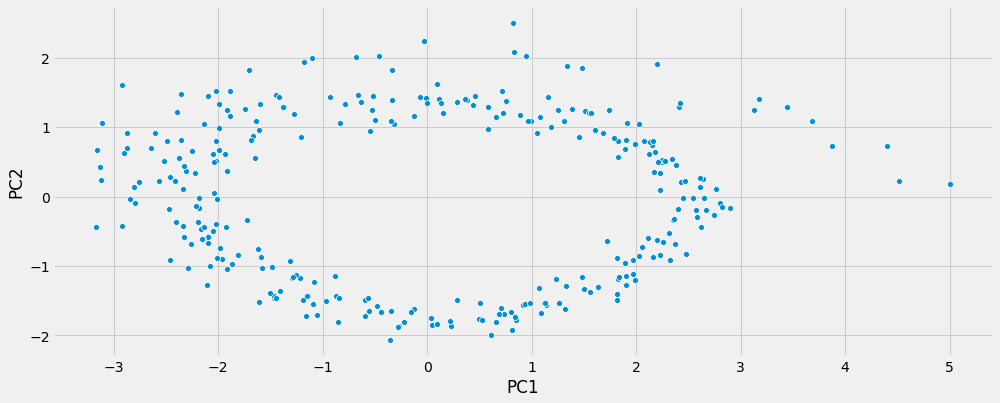

In [71]:
ax = sns.scatterplot(x="PC1", y="PC2",data=x_pca)

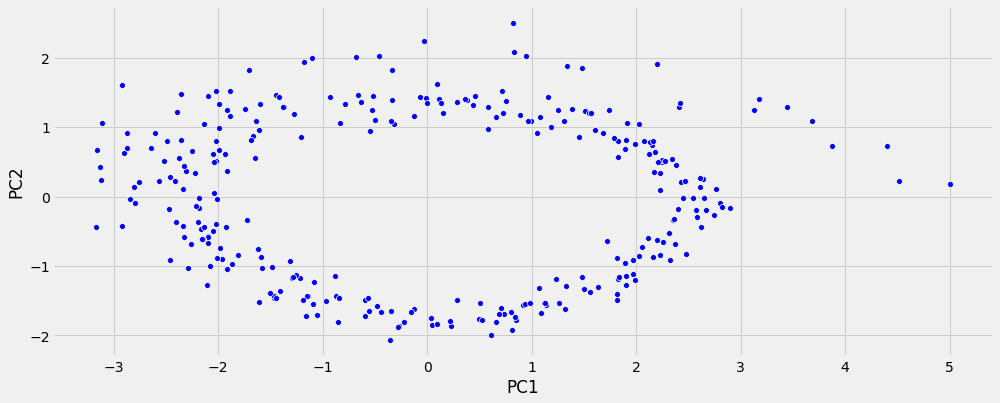

In [72]:
ax = sns.scatterplot(x="PC1", y="PC2",data=x_pca,color='b')

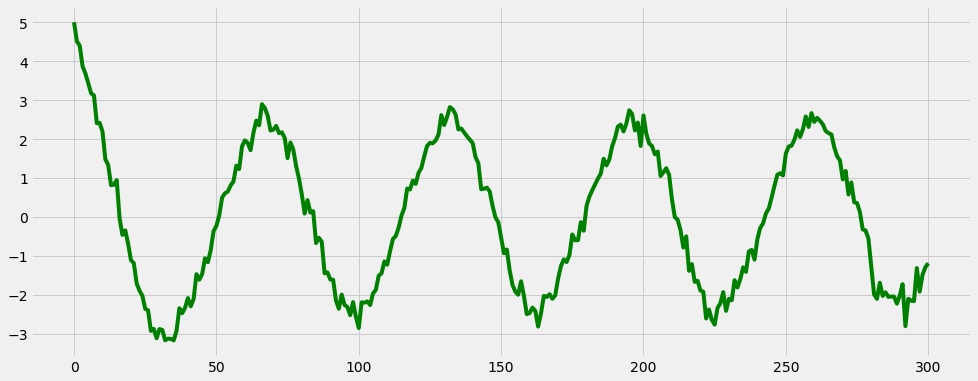

In [73]:
from matplotlib import pyplot as plt
plt.plot(x_pca['PC1'],color='g')

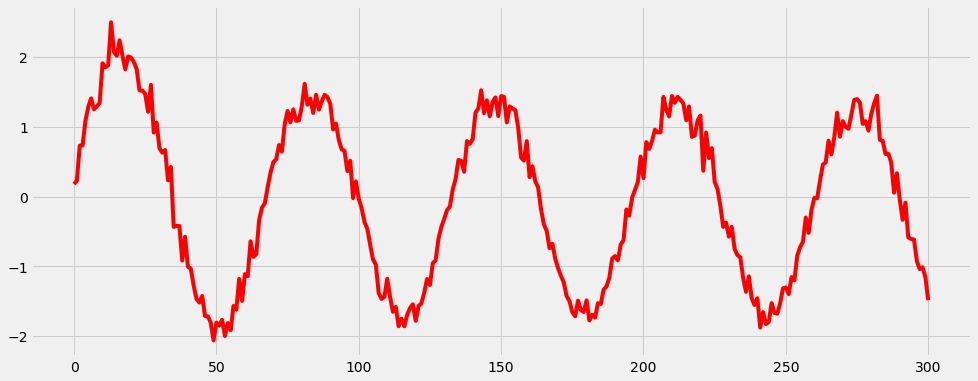

In [74]:
plt.plot(x_pca['PC2'],color='r')

## Regression


In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv('data.csv')
df.head()

,Time (min),x1,x2,x3,x4,x5
0,0.0,1.026883,0.452576,0.010064,0.559813,0.427413
1,0.1,1.026280,0.515807,0.083923,0.638963,0.598679
2,0.2,0.764232,0.519774,0.163960,0.693449,0.790495
3,0.3,0.871743,0.516790,0.208298,0.798266,0.898877
4,0.4,0.805830,0.425989,0.239270,0.915158,0.947471


In [78]:
cdf = df[['x3','x4','x5']]
cdf.head()

,x3,x4,x5
0,0.010064,0.559813,0.427413
1,0.083923,0.638963,0.598679
2,0.163960,0.693449,0.790495
3,0.208298,0.798266,0.898877
4,0.239270,0.915158,0.947471


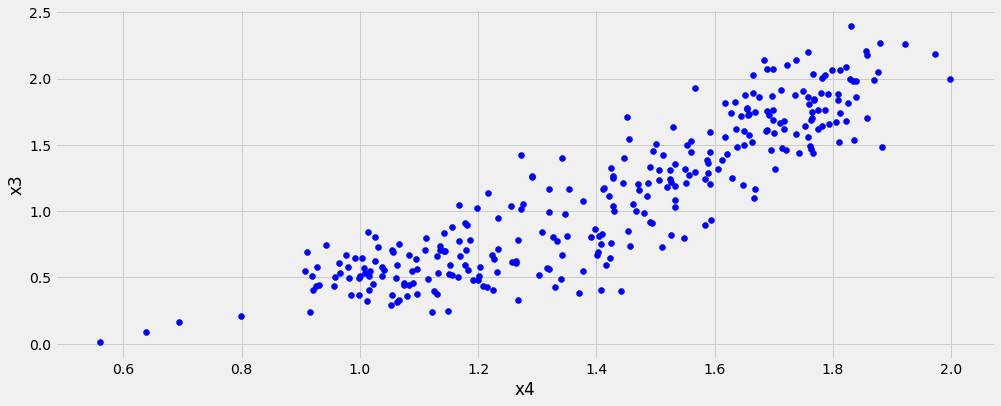

In [79]:
plt.scatter(cdf.x4, cdf.x3, color='blue')
plt.xlabel('x4')
plt.ylabel('x3')
plt.show()

In [80]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

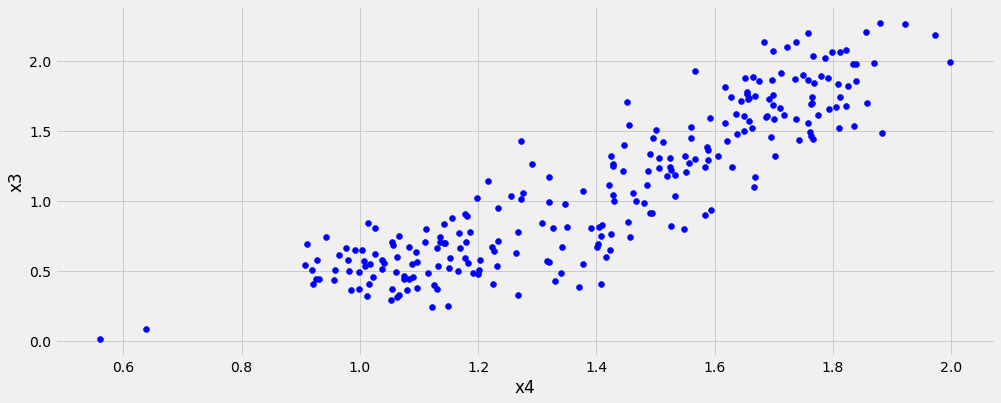

In [81]:
plt.scatter(train.x4, train.x3, color = 'blue')
plt.xlabel('x4')
plt.ylabel('x3')
plt.show()

In [82]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['x4','x5']])
y = np.asanyarray(train[['x3']])
regr.fit(x,y)
print('Coefficients: ', regr.coef_)

Coefficients:  [[-0.92666382  2.41340919]]


In [83]:
y_= regr.predict(test[['x4','x5']])
x = np.asanyarray(test[['x4','x5']])
y = np.asanyarray(test[['x3']])
print('Residual sum squares: %.2f' % np.mean((y_ - y) **2 ))
print('Variance score: %.2f' % regr.score(x,y)) # Explained variance score: 1 is perfect prediction

Residual sum squares: 0.01
Variance score: 0.96


In [84]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['x4','x5']])
y = np.asanyarray(train[['x3']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['x4','x5']])
x = np.asanyarray(test[['x4','x5']])
y = np.asanyarray(test[['x3']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-0.92666382  2.41340919]]
Residual sum of squares: 0.01
Variance score: 0.96


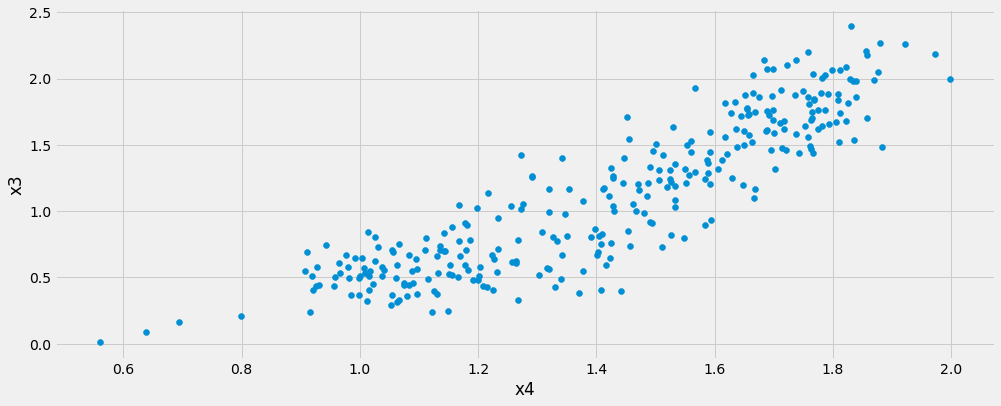

In [85]:
y=data.x3.values.reshape(-1,1)
x=data.x4.values.reshape(-1,1)#sklearn için gerekli
plt.scatter(x,y)
plt.ylabel('x3')
plt.xlabel('x4')
plt.show()

## Linear Regression

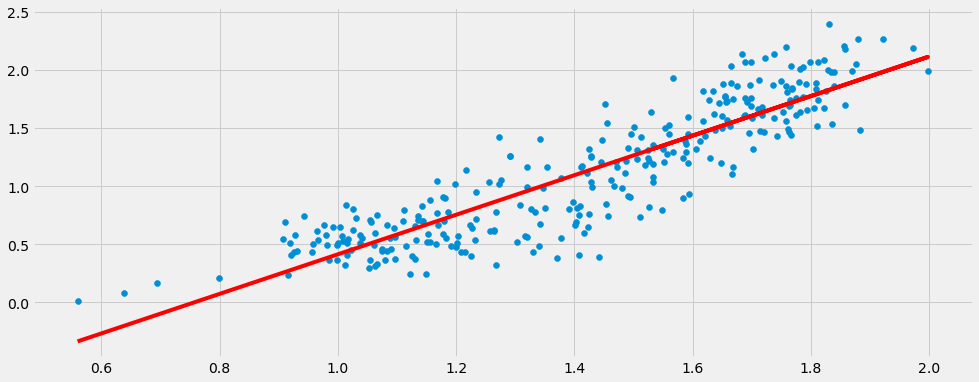

In [86]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_head=lr.predict(x)
plt.scatter(x,y)
plt.plot(x,y_head,color='red')
plt.show()

# Non Linear Regression

## Polynomial Linear Regression

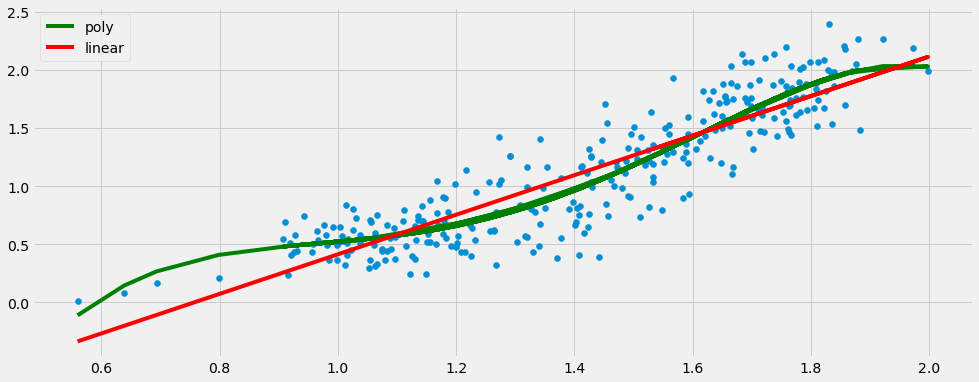

In [87]:
#Polynomial predict
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression=PolynomialFeatures(degree=4)
x_polynomial=polynomial_regression.fit_transform(x)

linear_regression2=LinearRegression()
linear_regression2.fit(x_polynomial,y)
y_head2=linear_regression2.predict(x_polynomial)
plt.scatter(x,y)
plt.plot(x,y_head2,color='green',label='poly')
plt.plot(x,y_head,color='red',label='linear')
plt.legend()
plt.show()

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data.csv')

In [4]:
X=data[['x4','x5']]
y=data['x3']

In [5]:
n = X.shape[1]
r = np.linalg.matrix_rank(X)

In [6]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

In [7]:
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

In [8]:
V = VT.T

In [9]:
X_plus = V.dot(D_plus).dot(U.T)

In [10]:
w = X_plus.dot(y)

In [11]:
error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2

In [12]:
np.linalg.lstsq(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([-1.49334244,  2.05962139]),
 array([29.12553977]),
 2,
 array([37.84975621,  1.06827475]))

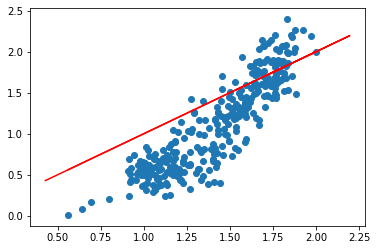

In [13]:
plt.scatter(X.x4, y)
plt.plot(X, X, c='red')

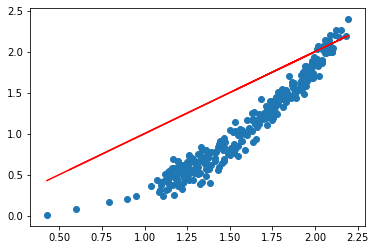

In [14]:
plt.scatter(X.x5, y)
plt.plot(X, X, c='red')

In [15]:
lr = LinearRegression()
lr.fit(X, y)
w = lr.coef_[0]

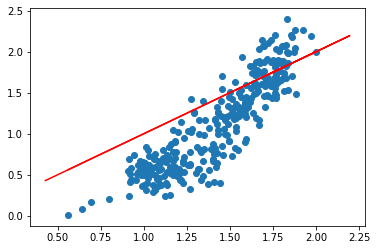

In [16]:
plt.scatter(X.x4, y)
plt.plot(X, X, c='red')

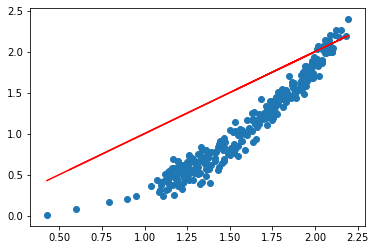

In [17]:
plt.scatter(X.x5, y)
plt.plot(X, X, c='red')

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('data.csv')

In [20]:
X=data[['x4','x5']]
y=data['x3']

In [21]:
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 0)

In [22]:
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 0)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240, 2), (240,), (61, 2), (61,))

In [24]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Chart with Data Points')

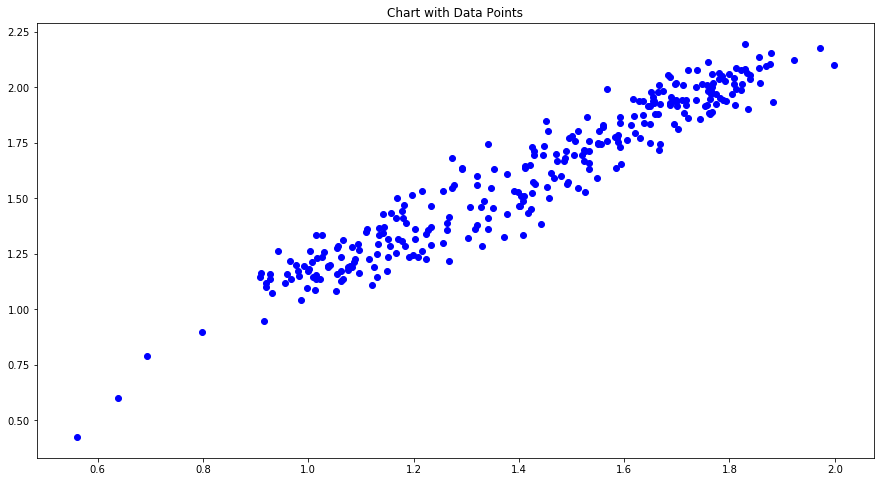

In [25]:
sample_train = X
import seaborn as sns
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.x4.values, sample_train.x5.values, color ='b');
plt.title("Chart with Data Points")

Text(0.5, 1.0, 'Chart with Average Line')

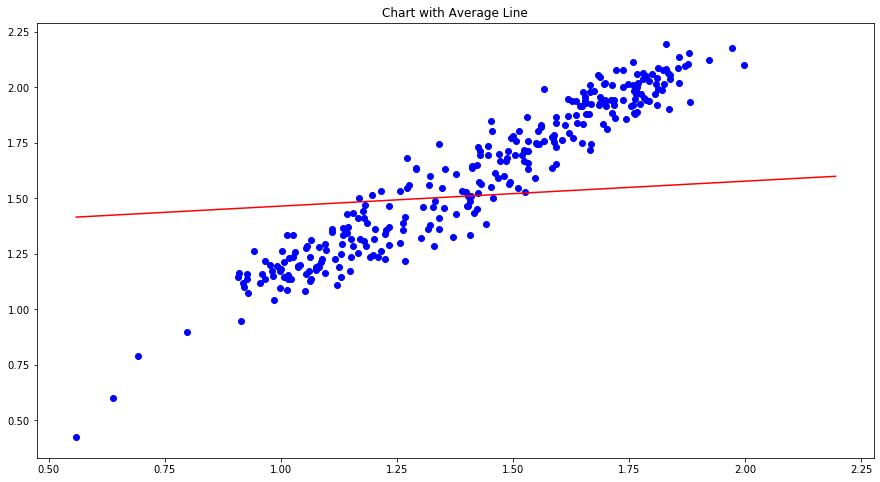

In [26]:
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.x4.values, sample_train.x5.values, color ='b');
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
ax.plot((sample_train.x4.values.min(),sample_train.x5.values.max()), (sample_train.x4.values.mean(),sample_train.x5.values.mean()), color = 'r');
plt.title("Chart with Average Line")

In [27]:
import numpy as np

In [28]:
sample_train['mean_sale_price'] = sample_train.x4.mean()
sample_train['mse'] = np.square(sample_train.mean_sale_price - sample_train.x4)
sample_train.mse.mean()
## getting mse
print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

Mean Squared Error(MSE) for average line is : 0.08750085380078243


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
## Calculating the beta coefficients by hand. 
## mean of y. 
y_bar = sample_train.x4.mean()
## mean of x. 
x_bar = sample_train.x4.mean()
## Std of y
std_y = sample_train.x5.std()
## std of x
std_x = sample_train.x5.std()
## correlation of x and y
r_xy = sample_train.corr().loc['x4','x5']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar

In [30]:
sample_train['x3'] = beta_0 + beta_1*sample_train['x4']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


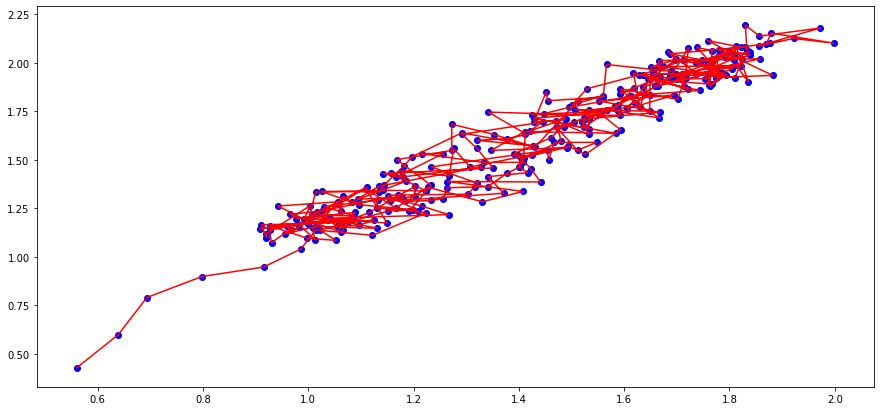

In [32]:
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(sample_train.x4, sample_train.x5, c='b')
ax.plot(sample_train['x4'], sample_train['x5'], color='r')

In [33]:
print("Mean Squared Error(MSE) for regression line is : {}".format(np.square(sample_train['x4'] - sample_train['x5']).mean()))

Mean Squared Error(MSE) for regression line is : 0.04295536828105639


In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sample_train['x4'], sample_train.x5)

0.04295536828105637

In [35]:
import matplotlib.gridspec as gridspec

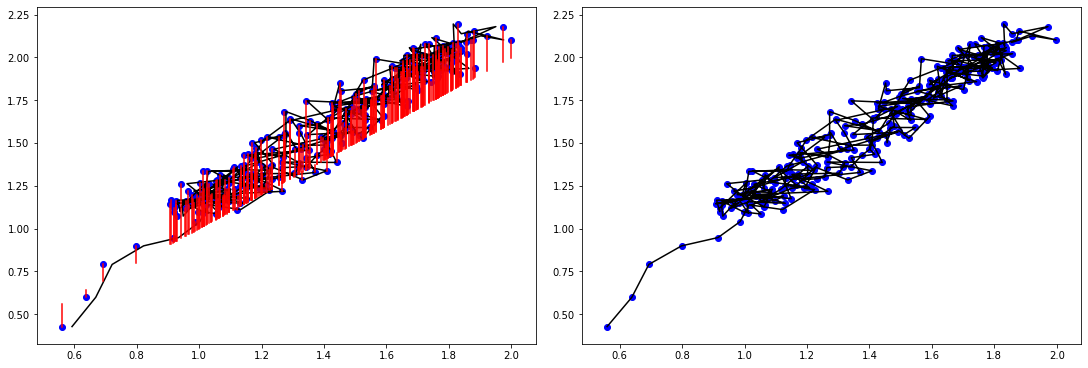

In [36]:
## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,5))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['x4'], y=sample_train['x5'], c='b')
ax1.plot(sample_train['x3'], sample_train['x5'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['x4'], row['x4']), (row['x5'], row['x4']), 'r-')
    
ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['x4'], y=sample_train['x5'], c='b')
ax2.plot(sample_train['x4'], sample_train['x5'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['x4'], row['x4']), (row['x5'], row['x5']), 'r-')

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [38]:
print ('%.2f'%mean_squared_error(y_test, y_pred))

0.01


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [40]:
print ('%.8f'%scores.mean())

-0.05341913


In [41]:
## Importing Ridge. 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [42]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1e-15: 0.00946301339564791
1e-10: 0.009463013433399704
1e-08: 0.009463017170868171
1e-05: 0.00946678976849638
0.0001: 0.009500880101118851
0.001: 0.009851199553715356
0.01: 0.013776730733872745
0.5: 0.066684623034201
1: 0.09498487456135754
1.5: 0.12002583589768033
2: 0.14164225616087137
3: 0.17605287361569805
4: 0.20168942308330692
5: 0.22131993104064648
-1: 0.2680206747324351
10: 0.27518358953320093
20: 0.31300053950891754
30: 0.3278873962917662
40: 0.3358383096554782
-3: 2.3645720430819632
-2: 810.1011575465045


In [43]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1e-15: 0.5772438171345224
1e-10: 0.577243819437382
1e-08: 0.5772440474229587
1e-05: 0.5774741758782793
0.0001: 0.5795536861682499
0.001: 0.600923172776637
0.01: 0.8403805747662373
0.5: 4.06776200508626
1: 5.7940773482428085
1.5: 7.321575989758498
2: 8.640177625813154
3: 10.739225290557583
4: 12.303054808081718
5: 13.500515793479437
-1: 16.349261158678544
10: 16.78619896152526
20: 19.09303291004397
30: 20.001131173797738
40: 20.486136888984166
-3: 144.23889462799977
-2: 49416.17061033677


In [44]:
from sklearn.linear_model import Lasso 
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = Lasso(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7789.092185590416, tolerance: 0.007351980351077424
  positive)


In [45]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1e-15: 0.009463013395658424
1e-10: 0.009463014512596169
1e-08: 0.009463124982569883
1e-05: 0.009576251491685658
0.0001: 0.010747935210327405
0.001: 0.023332913826367672
0.01: 0.060455406005885996
0.5: 0.3619862835093544
1: 0.3619862835093544
1.5: 0.3619862835093544
2: 0.3619862835093544
3: 0.3619862835093544
4: 0.3619862835093544
5: 0.3619862835093544
10: 0.3619862835093544
20: 0.3619862835093544
30: 0.3619862835093544
40: 0.3619862835093544
-1: 18654.358764849534
-2: 74409.03535817862
-3: 167403.97504351384


In [46]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1e-15: 0.577243817135164
1e-10: 0.5772438852683666
1e-08: 0.5772506239367626
1e-05: 0.584151340992825
0.0001: 0.6556240478299719
0.001: 1.4233077434084285
0.01: 3.687779766359047
0.5: 22.08116329407062
1: 22.08116329407062
1.5: 22.08116329407062
2: 22.08116329407062
3: 22.08116329407062
4: 22.08116329407062
5: 22.08116329407062
10: 22.08116329407062
20: 22.08116329407062
30: 22.08116329407062
40: 22.08116329407062
-1: 1137915.8846558223
-2: 4538951.156848896
-3: 10211642.477654343


In [47]:
from sklearn.linear_model import ElasticNet
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = ElasticNet(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [48]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1e-15: 0.009463013395698137
1e-10: 0.009463018485090914
1e-08: 0.009463522304817536
1e-05: 0.009992882772518467
0.0001: 0.0155361533366353
0.001: 0.040387723653747994
0.01: 0.1308096551313099
0.5: 0.3619862835093544
1: 0.3619862835093544
1.5: 0.3619862835093544
2: 0.3619862835093544
3: 0.3619862835093544
4: 0.3619862835093544
5: 0.3619862835093544
10: 0.3619862835093544
20: 0.3619862835093544
30: 0.3619862835093544
40: 0.3619862835093544
-3: 0.5214039260445994
-2: 0.5238148282275058
-1: 0.5311648418152576


In [49]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1e-15: 0.5772438171375864
1e-10: 0.577244127590546
1e-08: 0.5772748605938698
1e-05: 0.6095658491236268
0.0001: 0.9477053535347532
0.001: 2.4636511428786276
0.01: 7.9793889630099075
0.5: 22.08116329407062
1: 22.08116329407062
1.5: 22.08116329407062
2: 22.08116329407062
3: 22.08116329407062
4: 22.08116329407062
5: 22.08116329407062
10: 22.08116329407062
20: 22.08116329407062
30: 22.08116329407062
40: 22.08116329407062
-3: 31.805639488720566
-2: 31.952704521877852
-1: 32.401055350730715
